Epoch 1/100
 - 2s - loss: 0.0931
Epoch 2/100
 - 1s - loss: 0.0642
Epoch 3/100
 - 1s - loss: 0.0605
Epoch 4/100
 - 1s - loss: 0.0401
Epoch 5/100
 - 1s - loss: 0.0150
Epoch 6/100
 - 1s - loss: 0.0043
Epoch 7/100
 - 1s - loss: 0.0029
Epoch 8/100
 - 1s - loss: 0.0032
Epoch 9/100
 - 1s - loss: 0.0027
Epoch 10/100
 - 1s - loss: 0.0031
Epoch 11/100
 - 1s - loss: 0.0022
Epoch 12/100
 - 1s - loss: 0.0024
Epoch 13/100
 - 1s - loss: 0.0023
Epoch 14/100
 - 1s - loss: 0.0018
Epoch 15/100
 - 1s - loss: 0.0017
Epoch 16/100
 - 1s - loss: 0.0016
Epoch 17/100
 - 1s - loss: 0.0019
Epoch 18/100
 - 1s - loss: 0.0017
Epoch 19/100
 - 1s - loss: 0.0015
Epoch 20/100
 - 1s - loss: 0.0020
Epoch 21/100
 - 1s - loss: 0.0018
Epoch 22/100
 - 1s - loss: 0.0019
Epoch 23/100
 - 1s - loss: 0.0015
Epoch 24/100
 - 1s - loss: 0.0018
Epoch 25/100
 - 1s - loss: 0.0015
Epoch 26/100
 - 1s - loss: 0.0018
Epoch 27/100
 - 1s - loss: 0.0019
Epoch 28/100
 - 1s - loss: 0.0016
Epoch 29/100
 - 1s - loss: 0.0017
Epoch 30/100
 - 1s - lo

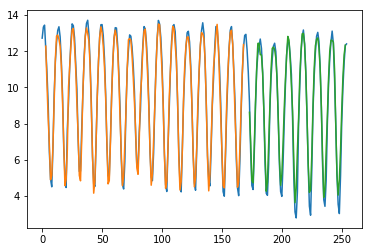

In [4]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('data.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [5]:
model.predict(testX)

array([[0.5342101 ],
       [0.38398945],
       [0.18900765],
       [0.17755395],
       [0.35915053],
       [0.58047974],
       [0.7539019 ],
       [0.88274646],
       [0.8838576 ],
       [0.8259601 ],
       [0.82424027],
       [0.73230577],
       [0.5432096 ],
       [0.32557768],
       [0.13514394],
       [0.18107353],
       [0.37333095],
       [0.5521298 ],
       [0.74888265],
       [0.85746604],
       [0.864502  ],
       [0.8517714 ],
       [0.8087309 ],
       [0.7093461 ],
       [0.49895394],
       [0.30039552],
       [0.16498917],
       [0.21851024],
       [0.37220564],
       [0.5522907 ],
       [0.7005734 ],
       [0.82342696],
       [0.91816586],
       [0.899068  ],
       [0.8003629 ],
       [0.6690349 ],
       [0.5388262 ],
       [0.2860821 ],
       [0.07699148],
       [0.149909  ],
       [0.3436249 ],
       [0.50537026],
       [0.7187212 ],
       [0.841928  ],
       [0.9314529 ],
       [0.93319786],
       [0.877378  ],
       [0.737